# Introduction

## Goals

I want to see the effect of pandemic lockdown policy to stock market in various aspect, like finance (BCA), daily utility (Unilever), and communication (Telkom)

## Libraries

In this project, I use YFinance to solve the problem of downloading stock data by offering a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance.

Python 3

Packages: pandas, numpy,  yfinance

## Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

I am using BCA, Unilever, and Telkom ticker from yahoo finance library

In [2]:
BCA = yf.download('BBCA',start='2019-06-01',end='2020-06-01')
UNI = yf.download('UNVR',start='2019-06-01',end='2020-06-01')
TEL = yf.download('TLK',start='2019-06-01',end='2020-06-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
tickers = ['BCA','UNI','TEL']

In [4]:
bank_stocks = pd.concat([BCA,UNI,TEL],axis=1,keys=tickers)
bank_stocks.head()

BCA                                                      \
                 Open       High        Low      Close  Adj Close  Volume   
Date                                                                        
2019-05-31  23.520000  23.760000  23.520000  23.719999  22.758236  113800   
2019-06-03  23.760000  23.930000  23.719999  23.799999  22.834990  306100   
2019-06-04  23.950001  24.120001  23.850000  24.080000  23.103640  101500   
2019-06-05  24.209999  24.230000  24.059999  24.120001  23.142017  118500   
2019-06-06  24.230000  24.290001  24.180000  24.240000  23.257153  249700   

                  UNI                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2019-05-31  20.580000  20.580000  19.950001  20.010000  20.010000  2733600   
2019-06-03  20.010000  20.660000  20.010000  20.520000  20.520000  2085500   
2019-06-04  20.790001  21.809999  20.790001  21.780001  21.780001  2043000   
2019-06-05  21.980000  22.070000  21.459999  21.709999  21.709999  1163500   
2019-06-06  21.639999  21.740000  21.184999  21.510000  21.510000  1277500   

                  TEL                                                      
                 Open       High        Low      Close  Adj Close  Volume  
Date                                                                       
2019-05-31  26.860001  27.270000  26.740000  26.969999  24.623932  290000  
2019-06-03  26.969999  27.400000  26.780001  27.230000  24.861315  305000  
2019-06-04  27.180000  27.240000  27.059999  27.139999  24.779142  312700  
2019-06-05  27.170000  27.500000  27.110001  27.340000  24.961748  185900  
2019-06-06  27.350000  27.459999  27.270000  27.379999  24.998266  140200

In [5]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BCA                                                      \
Stock Info        Open       High        Low      Close  Adj Close  Volume   
Date                                                                         
2019-05-31   23.520000  23.760000  23.520000  23.719999  22.758236  113800   
2019-06-03   23.760000  23.930000  23.719999  23.799999  22.834990  306100   
2019-06-04   23.950001  24.120001  23.850000  24.080000  23.103640  101500   
2019-06-05   24.209999  24.230000  24.059999  24.120001  23.142017  118500   
2019-06-06   24.230000  24.290001  24.180000  24.240000  23.257153  249700   

Bank Ticker        UNI                                                       \
Stock Info        Open       High        Low      Close  Adj Close   Volume   
Date                                                                          
2019-05-31   20.580000  20.580000  19.950001  20.010000  20.010000  2733600   
2019-06-03   20.010000  20.660000  20.010000  20.520000  20.520000  2085500   
2019-06-04   20.790001  21.809999  20.790001  21.780001  21.780001  2043000   
2019-06-05   21.980000  22.070000  21.459999  21.709999  21.709999  1163500   
2019-06-06   21.639999  21.740000  21.184999  21.510000  21.510000  1277500   

Bank Ticker        TEL                                                      
Stock Info        Open       High        Low      Close  Adj Close  Volume  
Date                                                                        
2019-05-31   26.860001  27.270000  26.740000  26.969999  24.623932  290000  
2019-06-03   26.969999  27.400000  26.780001  27.230000  24.861315  305000  
2019-06-04   27.180000  27.240000  27.059999  27.139999  24.779142  312700  
2019-06-05   27.170000  27.500000  27.110001  27.340000  24.961748  185900  
2019-06-06   27.350000  27.459999  27.270000  27.379999  24.998266  140200

# Exploratory Data Analysis (EDA)

In [7]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BCA    26.840000
UNI    24.450001
TEL    31.420000
dtype: float64

In [8]:
returns = pd.DataFrame()

i modified the tickers in percentage form to make it easier to read

In [9]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [10]:
returns.head()

,BCA Return,UNI Return,TEL Return
Date,,,
2019-05-31,NaN,NaN,NaN
2019-06-03,0.003373,0.025487,0.009640
2019-06-04,0.011765,0.061404,-0.003305
2019-06-05,0.001661,-0.003214,0.007369
2019-06-06,0.004975,-0.009212,0.001463


In [11]:
returns.idxmin() #minimum stock change in a year

BCA Return   2020-03-12
UNI Return   2020-03-16
TEL Return   2020-03-18
dtype: datetime64[ns]

In [12]:
returns.idxmax() #maximum stock change in a year

BCA Return   2020-03-24
UNI Return   2020-03-24
TEL Return   2020-03-26
dtype: datetime64[ns]

In [27]:
returns.std() #the standart deviation for each tick

BCA Return    0.023019
UNI Return    0.042807
TEL Return    0.024457
dtype: float64

# Visualizing Data

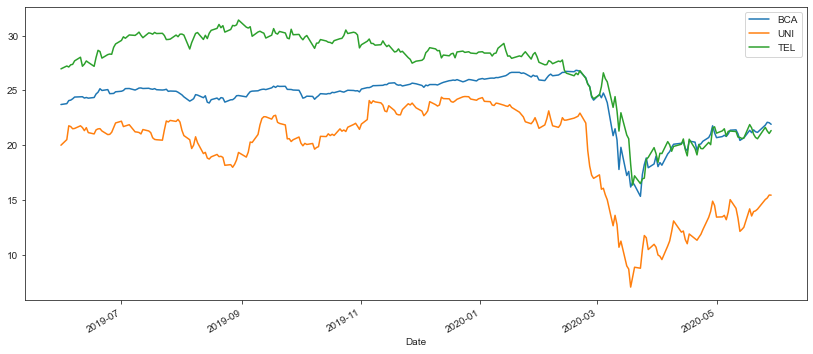

In [22]:
plt.figure(figsize=(14,6))
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick)
plt.legend()

we can see that in early april the stock market in all sector (representative) is plummeted because of pandemic lockdown policy. Daily utility has the biggest drop stock because lack of worker working in the factory, so the company can't produce their item like usuall of lockdown policy.

but now the stock is recovering



## Moving Avarages

all sector have the same curve of moving avarages

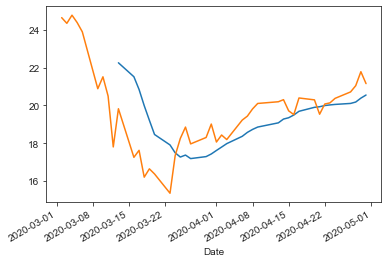

In [25]:
BCA['Close'].loc['2020-03-01':'2020-04-30'].rolling(window=10).mean().plot(label='avarage')
BCA['Close'].loc['2020-03-01':'2020-04-30'].plot(label='BCA')

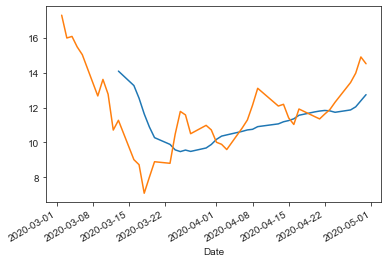

In [18]:
UNI['Close'].loc['2020-03-01':'2020-04-30'].rolling(window=10).mean().plot(label='avarage')
UNI['Close'].loc['2020-03-01':'2020-04-30'].plot(label='UNI')

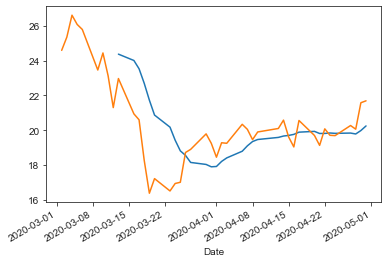

In [19]:
TEL['Close'].loc['2020-03-01':'2020-04-30'].rolling(window=10).mean().plot(label='avarage')
TEL['Close'].loc['2020-03-01':'2020-04-30'].plot(label='TEL')